### 1. Analyze the relationship between cholesterol levels and heart attack risk, considering additional factors such as BMI, blood pressure, triglyceride levels, and lifestyle habits. What patterns indicate a stronger correlation?

Data: https://drive.google.com/file/d/13ShLPdVJdjiCsyIuif4Ih45ZUA9Zu8Zz/view?usp=sharing

In [16]:
# To Do: Find the answer to the query using code

In [17]:
#importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt

#loading the dataset
file_path = r"C:\Users\Hp\Downloads\Heart_Attack_Male.csv" #assigning the file path
df = pd.read_csv(file_path)
df.head(10) #printing the first 10 rows to confirm

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East_M,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,27,Male,East_M,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
2,20,Male,West_M,Rural,Middle,Never,Never,Non-Vegetarian,High,2,...,High,171.5/107.1,115,Normal,Atypical,142,No,93.0,129,No
3,29,Male,East_M,Rural,High,Regularly,Never,Non-Vegetarian,Moderate,8,...,Low,176.7/110.0,118,Normal,Non-anginal,181,No,93.4,444,No
4,35,Male,West_M,Urban,High,Occasionally,Never,Non-Vegetarian,Sedentary,12,...,High,140.5/106.1,110,Normal,Asymptomatic,141,No,97.1,297,No
5,24,Male,North-East_M,Rural,Low,Never,Never,Vegetarian,Sedentary,8,...,Medium,143.7/84.7,85,Abnormal,Atypical,107,No,96.5,469,Yes
6,22,Male,West_M,Rural,High,Never,Occasionally,Vegetarian,Sedentary,10,...,Low,128.5/67.7,73,Normal,Asymptomatic,111,No,96.4,177,No
7,31,Male,Central_M,Urban,High,Never,Regularly,Non-Vegetarian,Sedentary,5,...,Low,172.6/71.2,95,Abnormal,Typical,205,No,99.9,207,No
8,23,Male,West_M,Urban,Middle,Never,Regularly,Vegetarian,Sedentary,0,...,Medium,137.3/80.1,70,Normal,Typical,203,No,98.5,487,No
9,25,Male,East_M,Rural,Middle,Never,Never,Vegetarian,Sedentary,7,...,High,144.2/92.2,104,Normal,Typical,203,No,97.1,63,No


In [18]:
#Inspecting and cleaning the data
# Getting basic information
df.info()

# Checking for missing values
df.isnull().sum()

#Splitting the blood pressure into two seperate columns(Systolic and Disdtolic)
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure (systolic/diastolic mmHg)'].str.split('/', expand=True).astype(float)

# Converting heart attack likelihood to numerical for easier use
df['Heart Attack Likelihood'] = df['Heart Attack Likelihood'].map({'Yes': 1, 'No': 0})

# Confirming changes
df[['Systolic BP', 'Diastolic BP', 'Heart Attack Likelihood']].head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       4913 non-null   int64  
 1   Gender                                    4913 non-null   object 
 2   Region                                    4913 non-null   object 
 3   Urban/Rural                               4913 non-null   object 
 4   SES                                       4913 non-null   object 
 5   Smoking Status                            4913 non-null   object 
 6   Alcohol Consumption                       4913 non-null   object 
 7   Diet Type                                 4913 non-null   object 
 8   Physical Activity Level                   4913 non-null   object 
 9   Screen Time (hrs/day)                     4913 non-null   int64  
 10  Sleep Duration (hrs/day)            

,Systolic BP,Diastolic BP,Heart Attack Likelihood
0,177.0,63.1,0
1,177.1,90.0,1
2,171.5,107.1,0
3,176.7,110.0,0
4,140.5,106.1,0
5,143.7,84.7,1
6,128.5,67.7,0
7,172.6,71.2,0
8,137.3,80.1,0
9,144.2,92.2,0


In [19]:
# Selecting relevant numeric columns
columns_of_interest = [
    "Cholesterol Levels (mg/dL)", "BMI (kg/m²)", "Systolic BP", "Diastolic BP", 
    "Triglyceride Levels (mg/dL)", "Heart Attack Likelihood"
]

# Calculating the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Showing the correlations with heart attack likelihood
correlation_matrix["Heart Attack Likelihood"].sort_values(ascending=False)


Heart Attack Likelihood        1.000000
Cholesterol Levels (mg/dL)     0.007020
Diastolic BP                   0.006972
BMI (kg/m²)                    0.006629
Triglyceride Levels (mg/dL)    0.004440
Systolic BP                    0.002871
Name: Heart Attack Likelihood, dtype: float64

Query 1 Answer: The correlation between cholestrol levels and heart attack risk is 0.007. This suggests that the  cholesterol levels alone do not strongly predict heart attack risk and that other factors such as BMI, blood pressure & Triglyceride levels may interact in a non linear way to increase risk.

### 2. Visualize how profit is distributed across different categories using a pie chart, and explode the wedge with the highest percentage of profit across all categories.

Data: https://drive.google.com/file/d/1-cCEA9WxaLbjx8MwQJUfrQOfznnE_r5k/view?usp=sharing

In [ ]:
# To Do: Find the answer to the query using code
# #Importing the neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
file_path2 = r"C:\Users\Hp\Downloads\Superstore.csv"
df = pd.read_csv(file_path2)

# Displaying the first few rows
df.head(10)



,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [14]:
# Check column names
print(df.columns)

# Check for missing values
df[["Category", "Profit"]].isnull().sum()
df["Profit"].fillna(0, inplace=True)

# Group by category and sum the profit
category_profit = df.groupby("Category")["Profit"].sum()

# Display profit distribution
print(category_profit)

# Get the category with the highest profit
max_profit_category = category_profit.idxmax()
print(f"The category with the highest profit is: {max_profit_category}")




Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')
Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145451.9773
Name: Profit, dtype: float64
The category with the highest profit is: Technology


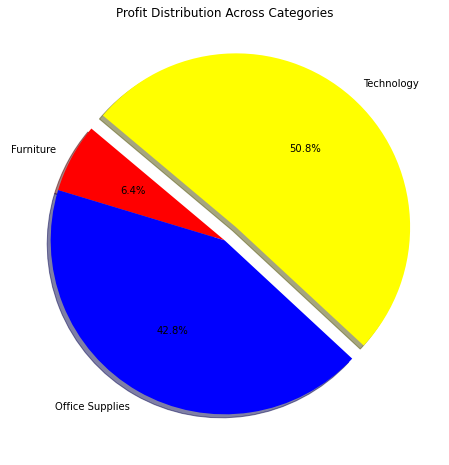

In [15]:
# Defining explode values (explode the highest profit category only)
explode_values = [0.1 if category == max_profit_category else 0 for category in category_profit.index]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_profit, labels=category_profit.index, autopct='%1.1f%%', startangle=140, 
        explode=explode_values, shadow=True, colors=["red","blue","yellow"])

# Adding title of the plot
plt.title("Profit Distribution Across Categories")
#Query 2 Answer:
# Showing the pie chart
plt.show()


### 3. Visualize the global sales trends of Nintendo games over time using a line plot. How have Nintendo's sales figures evolved from the 1980s to the 2000s?

Data: https://drive.google.com/file/d/1IwbdhYcqMEf4zZH0Hfgbev9pCrpvJiGk/view?usp=sharing

In [ ]:
# To Do: Find the answer to the query using code
# #importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset without headers
file_path3 =  r"C:\Users\Hp\Downloads\vgsales_no_headers.csv"
df = pd.read_csv(file_path3, header=None)

# Display first 5 rows
df.head(10)




,0,1,2,3,4,5,6,7,8,9,10
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


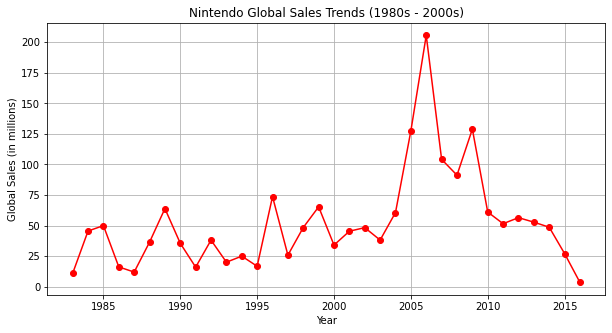

In [24]:
# Assigning names only to necessary columns
df.rename(columns={3: "Year", 5: "Publisher", 10: "Global_Sales"}, inplace=True)

# Display first few rows to confirm changes
df.head(10)

# Converting 'Year' to numeric (error handing)
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Filtering out only Nintendo games
nintendo_df = df[df["Publisher"] == "Nintendo"]

# Dropping rows with missing Year values
nintendo_df = nintendo_df.dropna(subset=["Year"])

# Grouping by Year and sum Global Sales
nintendo_sales_trend = nintendo_df.groupby("Year")["Global_Sales"].sum()

# Plotting Nintendo's global sales over time
plt.figure(figsize=(10, 5))
plt.plot(nintendo_sales_trend.index, nintendo_sales_trend.values, marker="o", linestyle="-", color="red")

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.title("Nintendo Global Sales Trends (1980s - 2000s)")
plt.grid(True)

# Showing the plot
plt.show()



Query 3 Answer: The line graph shows a sharp growth in the mid-1980s which may be due to the success of the Nintendo Entertainment System (NES) and games. Nintendo experienced fluctuations in the late 1980s & early 1990s and Peak sales in the 2000s.

### 4. In Saudi Arabia, the 5-day workweek starts on Sunday. Analyze the impact of the weekend and weekday quote dates on the quote price.

Data: https://drive.google.com/file/d/1vROMYOn9OUrIS7ChIIzkGpjeEdxm5Pe1/view?usp=sharing

In [ ]:
# To Do: Find the answer to the query using code
import pandas as pd

# Loading the dataset
file_path4 =  r"C:\Users\Hp\Downloads\luxury_goods_selling_transaction - quote_sell_dataset - luxury_goods_selling_transaction - quote_sell_dataset.csv"
df = pd.read_csv(file_path4)

# Displaying the first few rows
df.head(10)


,Quote ID,Product Name,Purchased Year,Luxury Brand,Selling Platform,Quote Date,Quote Price,Sold Price,Category,Condition,Status,Payment Method
0,2842302,ALEXANDER WANG Rhinestone Mesh Mini,2019,Alexander Wang,Fashionphile,2022-11-03,300.0,300.0,handbag,Pre-owned,Completed,ACH
1,2455752,BALENCIAGA Agneau Classic Hardware City,2014,Balenciaga,Fashionphile,2022-04-27,450.0,450.0,handbag,Pre-owned,Completed,Paypal
2,2455734,BALENCIAGA Chevre Gold Metallic Edge,2013,Balenciaga,Fashionphile,2022-04-26,950.0,950.0,handbag,Pre-owned,Completed,Paypal
3,18640,Baobao Issey Miyake clutch,2020,Baobao,CoutureUSA,2022-11-16,142.5,0.0,handbag,New,Seller Declined,NaN
4,18957,Burberry Nova check tote,2016,Burberry,CoutureUSA,2022-12-05,290.0,0.0,handbag,Pre-owned,Seller Declined,NaN
5,895933,Burberry Pocket Bag Check Canvas and Leather Mini,2020,Burberry,Rebag,2022-11-14,420.0,0.0,handbag,New,Seller Declined,NaN
6,18261,Burberry Pocket Bag Check Canvas and Leather Mini,2020,Burberry,CoutureUSA,2022-11-02,514.5,0.0,handbag,New,Seller Declined,NaN
7,18319,Burberry Thomas Bear Bag Charm key chain,2017,Burberry,CoutureUSA,2022-11-05,85.0,0.0,accessories,New,Seller Declined,NaN
8,18265,Burberry vintage check calfskin barrel bag,2020,Burberry,CoutureUSA,2022-11-02,400.0,0.0,handbag,New,Seller Declined,NaN
9,887418,Burberry vintage check calfskin barrel bag,2020,Burberry,Rebag,2022-11-01,315.0,0.0,handbag,New,Seller Declined,NaN


In [31]:
# Renaming and converting the quote date column to datetime format so I can work numerically
df.rename(columns={"Quote Date": "quote_date"}, inplace=True)

df["quote_date"] = pd.to_datetime(df["quote_date"], errors="coerce")

# Extracting the day of the week (0=Monday, 6=Sunday)
df["day_of_week"] = df["quote_date"].dt.weekday

# Defining a function to categorize weekends and weekdays
def categorize_day(day):
    return "Weekend" if day in [5, 6] else "Weekday"

# Applying the function to create a new column for day_type
df["day_type"] = df["day_of_week"].apply(categorize_day)

# Checking the distribution
df["day_type"].value_counts()

#printing the df
df



,Quote ID,Product Name,Purchased Year,Luxury Brand,Selling Platform,quote_date,Quote Price,Sold Price,Category,Condition,Status,Payment Method,day_of_week,day_type
0,2842302,ALEXANDER WANG Rhinestone Mesh Mini,2019,Alexander Wang,Fashionphile,2022-11-03,300.0,300.0,handbag,Pre-owned,Completed,ACH,3,Weekday
1,2455752,BALENCIAGA Agneau Classic Hardware City,2014,Balenciaga,Fashionphile,2022-04-27,450.0,450.0,handbag,Pre-owned,Completed,Paypal,2,Weekday
2,2455734,BALENCIAGA Chevre Gold Metallic Edge,2013,Balenciaga,Fashionphile,2022-04-26,950.0,950.0,handbag,Pre-owned,Completed,Paypal,1,Weekday
3,18640,Baobao Issey Miyake clutch,2020,Baobao,CoutureUSA,2022-11-16,142.5,0.0,handbag,New,Seller Declined,NaN,2,Weekday
4,18957,Burberry Nova check tote,2016,Burberry,CoutureUSA,2022-12-05,290.0,0.0,handbag,Pre-owned,Seller Declined,NaN,0,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,17954,Prada Patent Ballet Flats - Burgundy,2016,Prada,CoutureUSA,2022-10-13,55.0,0.0,shoes,Pre-owned,Seller Declined,NaN,3,Weekday
62,2834672,TOM FORD Angela Sunglasses TF438,2020,Tom Ford,Fashionphile,2022-11-15,75.0,75.0,accessories,Pre-owned,Completed,ACH,1,Weekday
63,2811343,VALENTINO GARAVANI Nylon Camouflage Backpack,2017,Valentino Garavani,Fashionphile,2022-10-17,100.0,100.0,handbag,Pre-owned,Completed,ACH,0,Weekday
64,18262,Van Cleef & Arpels Vintage Alhambra pendant 18...,2019,Van Cleef & Arpels,CoutureUSA,2022-11-02,1600.0,1600.0,accessories,Pre-owned,Completed,NaN,2,Weekday


In [32]:
# Grouping by weekday/weekend and calculating the average quote price
df.rename(columns={"Quote Price": "quote_price"}, inplace=True)

price_comparison = df.groupby("day_type")["quote_price"].mean()

# Displaying the comparison
print(price_comparison)


day_type
Weekday    877.58871
Weekend    292.25000
Name: quote_price, dtype: float64


Query 4 Answer: From the results, the average weekday(sunday-thursday) quote price is 877.59 which is significantly higher than the average weekend (friday-sunday) quote price. This can be caused by a few possible reasons: 
1. Businesses or individuals may request more quotes when offices and companies are open, leading to higher prices.
2. Sellers might offer lower prices on weekends to attract buyers during low-demand periods.

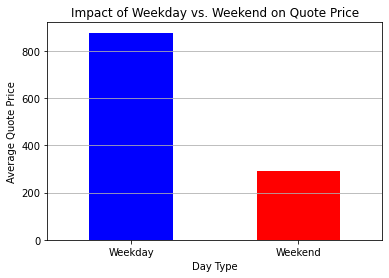

In [33]:
#showing the result in a bar chart
import matplotlib.pyplot as plt

# Bar chart for weekday vs. weekend quote prices
plt.figure(figsize=(6, 4))
price_comparison.plot(kind="bar", color=["blue", "red"])
plt.xlabel("Day Type")
plt.ylabel("Average Quote Price")
plt.title("Impact of Weekday vs. Weekend on Quote Price")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()
